Errors and Exception Handling

In [1]:
float('1.2345')

1.2345

In [2]:
float('something')

ValueError: could not convert string to float: 'something'

In [3]:
def attempt_float(x):
    try:
        return float(x)
    except:
        return x

In [4]:
attempt_float('1.2345')

1.2345

In [5]:
attempt_float('something')

'something'

You might notice that float can raise exceptions other than ValueError:

In [7]:
float((1, 2))

TypeError: float() argument must be a string or a number, not 'tuple'

In [8]:
def attempt_float(x):
    try:
        return float(x)
    except ValueError:
        return x

In [9]:
attempt_float((1, 2))

TypeError: float() argument must be a string or a number, not 'tuple'

You can catch multiple exception types by writing a tuple of exception types instead (the parentheses are required):

In [11]:
def attempt_float(x):
    try:
        return float(x)
    except (TypeError, ValueError):
        return x

In some cases, you may not want to suppress an exception, but you want some code to be executed regardless of whether the code in the try block succeeds or not. To do this, use finally:

In [13]:
f = open(path, 'w')

try:
    write_to_file(f)
finally:
    f.close()

NameError: name 'path' is not defined

Here, the file handle f will always get closed. Similarly, you can have code      that executes only if the try: block      succeeds using else:

In [16]:
f = open(path, 'w')

try:
    write_to_file(f)
except:
    print('Failed')
else:
    print('Succeeded')
finally:
    f.close()

NameError: name 'path' is not defined

Exceptions in IPython

In [18]:
#Files and the Operating System

In [22]:
#To open a file for reading or writing, use the built-in open function    with either a relative or absolute file path:

path = 'C:\\Users\\TejYadav\\Desktop\\inspiration.txt'

In [23]:
f = open(path)

In [24]:
for line in f:
    pass

In [25]:
lines = [x.rstrip() for x in open(path)]

In [26]:
lines

['Participate in :',
 'HackerRank',
 'CodeWars',
 'CoderByte',
 'TopCoder',
 'LeetCode',
 'Kaggle',
 '',
 'AI skills academy:',
 'https://ibm-ai-skills-academy.slack.com/messages/CAQ2B5LHY/',
 '',
 '',
 'The most highly recommended books for Engineers are:',
 'Design Patterns',
 'Refactoring',
 'Code Complete',
 'Clean Code',
 'The Pragmatic Programmer',
 'Introduction to Algorithms (Must read)',
 '',
 'https://courses.cognitiveclass.ai/courses/course-v1:CognitiveClass+RP0103EN+v2/courseware/407a9f86565c44189740699636b4fb85/245c8cffdcaa406e98a8e72aa76604d9/',
 'https://www.ibm.com/certify/exam?id=C2090-011  - SPSS Stats Exam',
 'https://www.ibm.com/certify/exam?id=C1000-011  - IBM Blockchain exam',
 '',
 'Cute - Endearing, Cherubic, Flawless, captivating',
 'Tired - Haggard, ragged, weary, exhausted',
 'Poor - Terrible, Dreadful, Abhorrent, Uninspired',
 'Near - Adjacent, Impending, Proximate',
 'Angry - Apoplectic, Indignant, Livid',
 'Necessary - Compulsory, Mandatory, Unalterable',


In [27]:
f.close()

In [28]:
with open(path) as f:
    lines = [x.rstrip() for x in f]

In [29]:
f = open(path)

In [30]:
f.read(10)

'Participat'

In [31]:
f2 = open(path, 'rb') # Binary mode

In [32]:
f2.read(10)

b'Participat'

In [33]:
f.tell()

10

In [34]:
f2.tell()

10

In [41]:
import sys  #default encoding in the sys module

In [37]:
sys.getdefaultencoding()

'utf-8'

In [38]:
#seek changes the file position to the indicated byte in the file:

In [39]:
f.seek(3)

3

In [40]:
f.read(1)

't'

In [42]:
#Lastly, we remember to close the files:

f.close()

In [43]:
f2.close()

The default behavior for Python files (whether readable or writable) is      text mode, which means that you intend to work with      Python strings (i.e., Unicode). This contrasts with binary mode, which you can      obtain by appending b onto the file mode. Let’s look      at the file (which contains non-ASCII characters with UTF-8 encoding)      from the previous section:

In [45]:
with open(path) as f:
         chars = f.read(10)

In [46]:
chars

'Participat'

In [47]:
with open(path, 'rb') as f:
    data = f.read(10)

In [48]:
data

b'Participat'

In [49]:
data.decode('utf8')

'Participat'

In [50]:
data[:4].decode('utf8')

'Part'

In [51]:
#Text mode, combined with the encoding option of      open, provides a convenient way to convert from one Unicode encoding to      another:

In [52]:
sink_path = 'sink.txt'

In [53]:
with open(path) as source:
    with open(sink_path, 'xt', encoding='iso-8859-1') as sink:
        sink.write(source.read())

UnicodeEncodeError: 'latin-1' codec can't encode character '\u2022' in position 6736: ordinal not in range(256)

In [55]:
with open(sink_path, encoding='iso-8859-1') as f:
    print(f.read(10))

In [56]:
f = open(path)

In [57]:
f.read(5)

'Parti'

In [58]:
f.seek(4)

4

In [59]:
f.read(1)

'i'

Ch4: NumPy Basics: Arrays and Vectorized  Computation

In [60]:
#NumPy - Numerical Python

In [61]:
import numpy as np

In [67]:
my_arr = np.arange(1000000)

In [68]:
my_list = list(range(1000000))

In [69]:
#Now let’s multiply each sequence by 2:

In [73]:
%time for _ in range(10): my_arr2 = my_arr * 2

Wall time: 31.3 ms


In [74]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 1.19 s


In [75]:
#To give you a flavor of how NumPy enables batch computations with similar syntax to scalar values on built-in Python objects, I first import NumPy and generate a small array of random data:

In [76]:
import numpy as np

generate some random data

In [78]:
data = np.random.randn(2, 3)

In [79]:
data

array([[-1.52667663, -1.76521331,  1.58190309],
       [ 0.75351523,  1.34173621,  0.92679678]])

In [80]:
# I then write mathematical operations with    data:

In [81]:
data * 10

array([[-15.26676634, -17.6521331 ,  15.81903094],
       [  7.53515227,  13.41736211,   9.26796778]])

In [82]:
data + data

array([[-3.05335327, -3.53042662,  3.16380619],
       [ 1.50703045,  2.68347242,  1.85359356]])

In [83]:
data.shape

(2, 3)

In [84]:
data.dtype

dtype('float64')

In [85]:
data1 = [6, 7.5, 8, 0, 1]

In [87]:
arr1 = np.array(data1)

In [88]:
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [89]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]

In [90]:
arr2 = np.array(data2)

In [91]:
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [92]:
arr2.ndim

2

In [93]:
arr2.shape

(2, 4)

In [94]:
arr1.dtype

dtype('float64')

In [95]:
arr2.dtype

dtype('int32')

In [96]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [97]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [98]:
np.empty((2, 3, 2))

array([[[8.84754799e-312, 2.86558075e-322],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 3.69776220e-062]],

       [[4.51138391e-090, 1.46495793e-075],
        [3.61014640e+174, 1.38321544e-047],
        [6.48224659e+170, 5.82471487e+257]]])

It’s not safe to assume that np.empty will return an array of all zeros. In some cases, it may return uninitialized “garbage” values.

In [100]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [101]:
arr1 = np.array([1, 2, 3], dtype=np.float64)

In [102]:
arr2 = np.array([1, 2, 3], dtype=np.int32)

In [103]:
arr1.dtype

dtype('float64')

In [104]:
arr2.dtype

dtype('int32')

In [105]:
arr = np.array([1, 2, 3, 4, 5])

In [106]:
arr.dtype

dtype('int32')

In [107]:
float_arr = arr.astype(np.float64)

In [108]:
float_arr.dtype

dtype('float64')

In [109]:
arr = np.array([3.2, -1.2, -2.6, 0.5, 12.9, 10.1])

In [110]:
arr

array([ 3.2, -1.2, -2.6,  0.5, 12.9, 10.1])

In [111]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [112]:
int_array = np.array(10)

In [114]:
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)

In [117]:
int_array.astype(calibers.dtype)

array(10.)

In [119]:
empty_uint32 = np.empty(8, dtype='u4')

In [120]:
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

In [121]:
#Basic Indexing and Slicing

In [122]:
arr = np.arange(10)

In [123]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [124]:
arr[5]

5

In [125]:
arr[5:8]

array([5, 6, 7])

In [126]:
arr[5:8] = 12

In [127]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [130]:
#create a slice of  arr:
arr_slice = arr[5:8]

In [131]:
arr_slice

array([12, 12, 12])

In [132]:
arr_slice[1] = 12345

In [133]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [134]:
arr_slice[:] = 64

In [135]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [136]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [137]:
arr2d[2]

array([7, 8, 9])

In [140]:
arr2d[0][2]

3

In [141]:
arr2d[0, 2]

3

In [143]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]])

In [144]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]]])

In [145]:
arr3d[0]

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [146]:
old_values = arr3d[0].copy()

In [147]:
arr3d[0] = 42

In [148]:
arr3d

array([[[42, 42, 42],
        [42, 42, 42],
        [42, 42, 42],
        [42, 42, 42]]])

In [149]:
arr3d[0] = old_values

In [150]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]]])

In [154]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [155]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [156]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [157]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [158]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [159]:
arr2d[:2, 2]

array([3, 6])

In [160]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [161]:
arr2d[:2, 1:] = 0

In [162]:
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

Boolean Indexing

In [163]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [164]:
data = np.random.randn(7, 4)

In [165]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [166]:
data

array([[ 0.51347491, -0.46063516,  0.40615651, -0.37333129],
       [-0.58136546,  1.15278504, -1.01319654,  1.4737233 ],
       [ 1.67308551, -0.95166766, -0.13897191,  1.31023366],
       [-1.06798386, -1.25299387, -0.43282945,  0.12386439],
       [-0.87944463,  1.08958806, -0.13422454, -0.24897455],
       [-0.20140333, -2.02729822,  0.7107193 , -1.10829675],
       [ 1.77347478,  0.62382413,  0.85697998,  0.07846596]])

In [167]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [168]:
data[names == 'Bob']

array([[ 0.51347491, -0.46063516,  0.40615651, -0.37333129],
       [-1.06798386, -1.25299387, -0.43282945,  0.12386439]])

In [169]:
data[names == 'Bob', 2:]

array([[ 0.40615651, -0.37333129],
       [-0.43282945,  0.12386439]])

In [170]:
data[names == 'Bob', 3]

array([-0.37333129,  0.12386439])

In [171]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [172]:
data[~(names == 'Bob')]

array([[-0.58136546,  1.15278504, -1.01319654,  1.4737233 ],
       [ 1.67308551, -0.95166766, -0.13897191,  1.31023366],
       [-0.87944463,  1.08958806, -0.13422454, -0.24897455],
       [-0.20140333, -2.02729822,  0.7107193 , -1.10829675],
       [ 1.77347478,  0.62382413,  0.85697998,  0.07846596]])

In [173]:
cond = names == 'Bob'

In [174]:
data[~cond]

array([[-0.58136546,  1.15278504, -1.01319654,  1.4737233 ],
       [ 1.67308551, -0.95166766, -0.13897191,  1.31023366],
       [-0.87944463,  1.08958806, -0.13422454, -0.24897455],
       [-0.20140333, -2.02729822,  0.7107193 , -1.10829675],
       [ 1.77347478,  0.62382413,  0.85697998,  0.07846596]])

In [175]:
mask = (names == 'Bob')

In [176]:
mask

array([ True, False, False,  True, False, False, False])

In [177]:
data[mask]

array([[ 0.51347491, -0.46063516,  0.40615651, -0.37333129],
       [-1.06798386, -1.25299387, -0.43282945,  0.12386439]])

In [178]:
data[data < 0] = 0

In [179]:
data

array([[0.51347491, 0.        , 0.40615651, 0.        ],
       [0.        , 1.15278504, 0.        , 1.4737233 ],
       [1.67308551, 0.        , 0.        , 1.31023366],
       [0.        , 0.        , 0.        , 0.12386439],
       [0.        , 1.08958806, 0.        , 0.        ],
       [0.        , 0.        , 0.7107193 , 0.        ],
       [1.77347478, 0.62382413, 0.85697998, 0.07846596]])

In [180]:
data[names != 'Joe'] = 7

In [181]:
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 1.15278504, 0.        , 1.4737233 ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.7107193 , 0.        ],
       [1.77347478, 0.62382413, 0.85697998, 0.07846596]])

In [182]:
#Fancy indexing is a term adopted by NumPy to describe indexing using integer arrays. Suppose we had an 8 × 4 array:

In [183]:
arr = np.empty((8, 4))

In [184]:
for i in range(8):
    arr[i] = i

In [185]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [186]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [187]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [190]:
arr = np.arange(32).reshape((8, 4))

In [191]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [193]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [194]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [195]:
#Transposing is a special form of reshaping that similarly returns a view on the underlying data without copying anything. Arrays have the transpose method and also the special T attribute:

In [196]:
arr = np.arange(15).reshape((3, 5))

In [197]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [198]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [199]:
#when computing the inner matrix product using np.dot:

arr = np.random.randn(6, 3)

In [200]:
arr

array([[-0.08057265, -1.48749738,  1.33130507],
       [ 0.34557628,  0.19654524,  0.18000976],
       [-1.09692054,  1.44478593,  0.68408946],
       [ 0.16413979, -1.07349271,  0.73150858],
       [-1.90206106,  2.29042386, -2.44242414],
       [-0.92485177, -0.09833042,  0.14929504]])

In [201]:
np.dot(arr.T, arr)

array([[ 5.82927854, -5.83883021,  3.83218228],
       [-5.83883021, 10.74678178, -7.35070581],
       [ 3.83218228, -7.35070581,  8.79558458]])

In [205]:
arr = np.arange(16).reshape((2, 2, 4))

In [206]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [207]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [208]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [209]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

In [210]:
#swapaxes similarly returns a view on the data without making a copy.

In [211]:
#A universal function, or ufunc, is a function that performs    element-wise operations on data in ndarrays.

In [212]:
arr = np.arange(10)

In [213]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [214]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [215]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [216]:
x = np.random.randn(8)

In [217]:
y = np.random.randn(8)

In [218]:
x

array([ 0.03501218,  1.33236505,  0.55079133, -2.3104897 ,  0.06261403,
        1.35121041, -2.0703416 ,  1.43213765])

In [219]:
y

array([-0.16033337,  0.38306716,  1.04622042,  1.1102766 , -0.66484102,
        0.79896508, -0.78408153, -0.8171097 ])

In [220]:
np.maximum(x, y)

array([ 0.03501218,  1.33236505,  1.04622042,  1.1102766 ,  0.06261403,
        1.35121041, -0.78408153,  1.43213765])

In [221]:
arr = np.random.randn(7)

In [222]:
arr

array([-0.42902618,  0.05841383, -1.30905741, -2.19094715,  0.35670896,
       -0.86785566, -2.01521209])

In [223]:
remainder, whole_part = np.modf(arr)

In [224]:
remainder

array([-0.42902618,  0.05841383, -0.30905741, -0.19094715,  0.35670896,
       -0.86785566, -0.01521209])

In [225]:
whole_part

array([-0.,  0., -1., -2.,  0., -0., -2.])

In [226]:
arr

array([-0.42902618,  0.05841383, -1.30905741, -2.19094715,  0.35670896,
       -0.86785566, -2.01521209])

In [227]:
np.sqrt(arr)

C:\Users\TejYadav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([       nan, 0.24168954,        nan,        nan, 0.59725117,
              nan,        nan])

In [228]:
np.sqrt(arr, arr)

C:\Users\TejYadav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([       nan, 0.24168954,        nan,        nan, 0.59725117,
              nan,        nan])

In [229]:
arr

array([       nan, 0.24168954,        nan,        nan, 0.59725117,
              nan,        nan])

In [230]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points

In [232]:
xs, ys = np.meshgrid(points, points)

In [233]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [234]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [235]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

In [236]:
import matplotlib.pyplot as plt

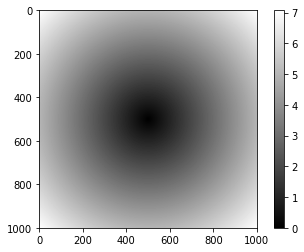

In [237]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

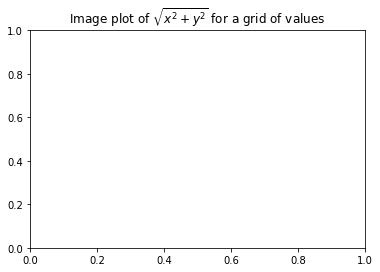

In [238]:
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [242]:
#Text(0.5,1, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

The numpy.where function is a      vectorized version of the ternary expression x if condition else y. Suppose we had a      boolean array and two arrays of values:

In [243]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

In [244]:
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

In [245]:
cond = np.array([True, False, True, True, False])

In [246]:
result = [(x if c else y)
         for x, y, c in zip(xarr, yarr, cond)]

In [248]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [249]:
result = np.where(cond, xarr, yarr)

In [250]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [251]:
arr = np.random.randn(4, 4)

In [252]:
arr

array([[-1.68329379, -1.1321063 ,  0.3275476 ,  0.70650107],
       [ 1.86176607, -1.18193695, -0.45143977, -0.89376004],
       [ 2.03609061, -0.10559291,  1.46330466, -0.19421406],
       [ 0.03390995, -0.46029798, -1.24774181,  1.09489574]])

In [253]:
arr > 0

array([[False, False,  True,  True],
       [ True, False, False, False],
       [ True, False,  True, False],
       [ True, False, False,  True]])

In [254]:
np.where(arr > 0, 2, -2)

array([[-2, -2,  2,  2],
       [ 2, -2, -2, -2],
       [ 2, -2,  2, -2],
       [ 2, -2, -2,  2]])

In [257]:
np.where(arr > 0, 2, arr)   #set only positive values to 2

array([[-1.68329379, -1.1321063 ,  2.        ,  2.        ],
       [ 2.        , -1.18193695, -0.45143977, -0.89376004],
       [ 2.        , -0.10559291,  2.        , -0.19421406],
       [ 2.        , -0.46029798, -1.24774181,  2.        ]])

A set of mathematical functions that compute statistics about an entire array or about      the data along an axis are accessible as methods of the array class.      You can use aggregations (often called reductions) like sum, mean,        and std (standard deviation) either      by calling the array instance method or using the top-level      NumPy function.

In [258]:
arr = np.random.randn(5, 4)

In [259]:
arr

array([[-0.14400106, -0.69885263,  2.13427575, -0.12311511],
       [ 0.77784985, -0.69220548, -1.363452  ,  0.28588652],
       [ 1.81198997,  0.18146653, -1.2509108 , -0.22975212],
       [ 0.98799988,  0.25483318, -2.0239217 ,  0.48127669],
       [ 2.28607686,  0.05964402,  0.85289588, -0.00526808]])

In [260]:
arr.mean()

0.17913580759198403

In [262]:
np.mean(arr)

0.17913580759198403

In [263]:
arr.sum()

3.5827161518396804

In [264]:
arr.mean(axis=1)

array([ 0.29207674, -0.24798028,  0.1281984 , -0.07495299,  0.79833717])

In [265]:
arr.sum(axis=0)

array([ 5.71991551, -0.89511438, -1.65111287,  0.4090279 ])

In [266]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

In [267]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [268]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [269]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [270]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [271]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

In [272]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

In [273]:
arr = np.random.randn(100)

In [274]:
(arr > 0).sum()  # Number of positive values

55

In [275]:
bools = np.array([False, False, True, False])

In [276]:
bools.any()

True

In [277]:
bools.all()

False

Sorting

In [278]:
#Python’s built-in list type, NumPy arrays can be sorted in-place with the sort method:

In [279]:
arr = np.random.randn(6)

In [280]:
arr

array([-0.10134108,  1.26817309,  1.18577672, -0.75298661,  0.73400124,
        1.17747491])

In [281]:
arr.sort()

In [282]:
arr

array([-0.75298661, -0.10134108,  0.73400124,  1.17747491,  1.18577672,
        1.26817309])

In [283]:
arr = np.random.randn(5, 3)

In [284]:
arr

array([[-0.4805616 , -0.04355867, -0.04635604],
       [ 0.18847846,  0.78266939,  0.45204763],
       [-0.67977729,  0.09815562, -0.30870896],
       [-0.67707466, -0.64425461, -0.44444366],
       [ 1.55348863,  1.1585854 ,  0.5140239 ]])

In [285]:
arr.sort(1)

In [286]:
arr

array([[-0.4805616 , -0.04635604, -0.04355867],
       [ 0.18847846,  0.45204763,  0.78266939],
       [-0.67977729, -0.30870896,  0.09815562],
       [-0.67707466, -0.64425461, -0.44444366],
       [ 0.5140239 ,  1.1585854 ,  1.55348863]])

In [287]:
large_arr = np.random.randn(1000)

In [288]:
large_arr.sort()

In [289]:
large_arr[int(0.05 * len(large_arr))] #5% quartile

-1.681699015241793

NumPy has some basic set operations for one-dimensional ndarrays. A commonly      used one is np.unique, which      returns the sorted unique values in an array:

In [290]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [291]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [292]:
ints = np.array([3, 3, 3,2, 2, 4, 4, 1, 1])

In [293]:
np.unique(ints)

array([1, 2, 3, 4])

In [294]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [295]:
#Another function, np.in1d, tests membership of the values in one array in another, returning a boolean array:

In [296]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

Linear Algebra

In [301]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])

In [302]:
y = np.array([[6., 23.,], [-1, 7], [8, 9]])

In [303]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [304]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [305]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [306]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [307]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In [308]:
x @ np.ones(3)

array([ 6., 15.])

In [309]:
from numpy.linalg import inv, qr

In [310]:
X = np.random.randn(5, 5)

In [311]:
mat = X.T.dot(X)

In [312]:
inv(mat)

array([[ 0.16867236, -0.09874675, -0.07369201,  0.07762306, -0.16178457],
       [-0.09874675,  0.61907038, -0.03518142, -0.03028146,  0.17451552],
       [-0.07369201, -0.03518142,  0.48986566, -0.32560403,  0.33425798],
       [ 0.07762306, -0.03028146, -0.32560403,  0.47005436, -0.31074251],
       [-0.16178457,  0.17451552,  0.33425798, -0.31074251,  0.58422122]])

In [313]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -7.40417749e-17,  3.17539847e-18,
         3.51363110e-17, -7.59530694e-17],
       [ 1.66859264e-17,  1.00000000e+00,  9.63765759e-17,
        -5.30745000e-17,  3.61863106e-17],
       [ 6.31966186e-17,  1.46308424e-16,  1.00000000e+00,
         2.43741004e-16, -1.27285617e-16],
       [-9.47503624e-17,  9.68039624e-18,  5.16004202e-16,
         1.00000000e+00,  1.85207255e-16],
       [-1.29051212e-16,  1.36799915e-16,  2.93306276e-16,
        -1.81007883e-16,  1.00000000e+00]])

In [315]:
q, r = qr(mat)

In [317]:
r

array([[-8.71179659, -0.57466567,  0.77680934, -0.18623842, -3.22332591],
       [ 0.        , -2.43209763, -3.40049395, -0.44186721,  3.17980197],
       [ 0.        ,  0.        , -4.52616814, -3.61334735,  0.77136003],
       [ 0.        ,  0.        ,  0.        , -3.33243925, -2.49719412],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.28433991]])

Pseudorandom Number Generation

The numpy.random module    supplements the built-in Python random with functions for efficiently generating    whole arrays of sample values from many kinds of probability    distributions. For example, you can get a 4 × 4 array of samples from the    standard normal distribution using normal:

In [318]:
samples = np.random.normal(size=(4, 4))

In [319]:
samples

array([[ 0.27083504,  0.83598422,  1.58634383, -1.58999389],
       [ 0.77706893,  1.50878863,  0.45826586,  1.93598835],
       [-0.11034782, -0.75665303,  1.05465748, -1.36871401],
       [-0.00613083,  1.1187112 ,  0.52222956, -0.60052782]])

In [320]:
from random import normalvariate

In [321]:
N = 100000

In [322]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

226 ms ± 120 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [323]:
%timeit np.random.normal(size=N)

3.26 ms ± 56.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [324]:
%timeit np.random.normal(size=N)

3.3 ms ± 85.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [325]:
np.random.seed(1234)

In [326]:
rng = np.random.RandomState(1234)

In [327]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

Example: Random Walks

#Here is a pure Python way to implement a single random walk with  1,000 steps using the built-in random    module:

In [334]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

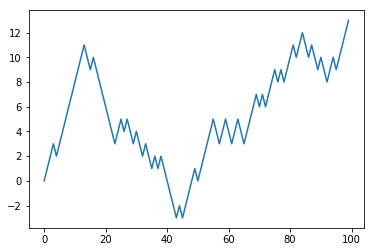

In [335]:
plt.plot(walk[:100])

You might make the observation that walk is simply the cumulative sum of the random    steps and could be evaluated as an array expression. Thus, I use the    np.random module to draw 1,000 coin    flips at once, set these to 1 and –1, and compute the cumulative    sum:

In [336]:
nsteps = 1000

In [337]:
draws = np.random.randint(0, 2, size=nsteps)

In [338]:
steps = np.where(draws > 0, 1, -1)

In [339]:
walk = steps.cumsum()

In [340]:
walk.min()

-9

In [341]:
walk.max()

60

In [342]:
#argmax, which    returns the first index of the maximum value in the boolean array    (True is the maximum value):

In [343]:
(np.abs(walk) >= 10).argmax()

297

In [344]:
nwalks = 5000

In [345]:
nsteps = 1000

In [346]:
draws = np.random.randint(0, 2, size=(nwalks, nsteps))  #0 or 1

In [347]:
steps = np.where(draws > 0, 1, -1)

In [348]:
walks = steps.cumsum(1)

In [349]:
walks

array([[  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       [  1,   2,   3, ..., -26, -27, -28],
       ...,
       [  1,   0,   1, ...,  64,  65,  66],
       [  1,   2,   1, ...,   2,   1,   0],
       [ -1,  -2,  -3, ...,  32,  33,  34]], dtype=int32)

compute the maximum and minimum values obtained over      all of the walks:

In [350]:
walks.max()

122

In [351]:
walks.min()

-128

Out of these walks, let’s compute the minimum crossing time to 30      or –30. This is slightly tricky because not all 5,000 of them reach 30.      We can check this using the any method:

In [352]:
hits30 = (np.abs(walks) >= 30).any(1)

In [353]:
hits30

array([ True,  True,  True, ...,  True, False,  True])

In [354]:
hits30.sum() #Number that hit 30 or -30

3368

We can use this boolean array to select out the rows of walks that actually cross the absolute 30      level and call argmax across axis 1      to get the crossing times:

In [355]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)

In [356]:
crossing_times.mean()

509.99762470308787

In [357]:
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))

In [358]:
steps

array([[-0.20472197, -0.03407671, -0.24781626, ...,  0.22195392,
         0.21250584,  0.43994277],
       [-0.09066595,  0.04741116,  0.09872352, ...,  0.10684413,
         0.2540548 , -0.22255203],
       [ 0.00942324,  0.03418277, -0.42305453, ..., -0.05711872,
        -0.11820873, -0.71117832],
       ...,
       [ 0.1230118 , -0.18155722,  0.12782267, ...,  0.0730254 ,
         0.06546779,  0.47920034],
       [-0.20550269,  0.16459572, -0.03138668, ...,  0.06915243,
         0.07831634,  0.27554056],
       [-0.23056172,  0.28924403,  0.08444807, ..., -0.27018412,
        -0.02140732,  0.06343304]])